In [1]:
from src.kunlib import (KUNet, Linear, LSTM, Transformer, 
    Kernel, KernelWrapper, KUNetEncoderDecoder, KUNetEncoder, KUNetDecoder, 
    Projector)
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
print("\n=== Basic Usage Examples ===")

# 1. Create simple KUNet model
print("1. Create KUNet model:")
model = KUNet(
    input_dim=32,
    input_len=10,
    latent_dim=64,
    output_dim=32,
    output_len=10,
    # Pass parameters directly, no dictionary needed
    unet_skip_concat=False,
    residual=True,
    verbose=True
)
print(model)
# Create random input tensor with appropriate dimensions
batch_size = 32
x = torch.randn(batch_size, model.input_len, model.input_dim).to(device)
print("\n2. Test model with random input:")
print(f"   Input shape: {x.shape}")

# Forward pass
output = model(x)
print(f"   Output shape: {output.shape}")

# Verify output dimensions match expected
expected_shape = (batch_size, model.output_len, model.output_dim)
print(f"   Expected output shape: {expected_shape}")
assert output.shape == expected_shape, f"Output shape {output.shape} doesn't match expected {expected_shape}"

print(f"   Model created successfully, parameter count: {sum(p.numel() for p in model.parameters())}")


=== Basic Usage Examples ===
1. Create KUNet model:
self.lag_list [10, 1]
hidden_dim_list [128]
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
KUNet(
  (model): KUNetEncoderDecoder(
    (encoder): KUNetEncoder(
      (layers): Sequential(
        (0): KernelWrapper(
          (kernel): Linear(
            (layers): Sequential(
              (0): Linear(in_features=320, out_features=224, bias=True)
              (1): Tanh()
              (2): Dropout(p=0.01, inplace=False)
              (3): Linear(in_features=224, out_features=128, bias=True)
            )
          )
        )
        (1): KernelWrapper(
          (kernel): Linear(
            (layers): Sequential(
              (0): Linear(in_features=128, out_features=96, bias=True)
              (1): Tanh()
              (2): Dropout(p=0.01, inplace=False)
              (3): Linear(in_fea

In [4]:

print("\n=== Different Kernel Usage Examples ===")

# 1. Linear Kernel
print("1. Linear Kernel:")
linear_kernel = Linear(
    input_dim=64,
    input_len=10,
    output_dim=64,
    output_len=5,
    # Pass parameters directly
    activation="relu",
    drop_out_p=0.1,
    kernel_hidden_layer=3
)
print(f"   Linear kernel created successfully")
print(linear_kernel)
x = torch.randn(batch_size, linear_kernel.input_len, linear_kernel.input_dim).to(device)
print("\n2. Test linear kernel with random input:")
print(f"   Input shape: {x.shape}")

# Forward pass through linear kernel
output = linear_kernel(x)
print(f"   Output shape: {output.shape}")

# 2. LSTM Kernel
print("\n2. LSTM Kernel:")
lstm_kernel = LSTM(
    input_dim=64,
    input_len=20,
    output_dim=64,
    output_len=10,
    # Pass parameters directly
    drop_out_p=0.2,
    kernel_hidden_layer=2
)
print(f"   LSTM kernel created successfully")
print(lstm_kernel)
x = torch.randn(batch_size, lstm_kernel.input_len, lstm_kernel.input_dim).to(device)
print("\n2. Test LSTM kernel with random input:")
print(f"   Input shape: {x.shape}")

# Forward pass through linear kernel
output = lstm_kernel(x)
print(f"   Output shape: {output.shape}")

# 3. Transformer Kernel
print("\n3. Transformer Kernel:")
transformer_kernel = Transformer(
    input_dim=128,
    input_len=4,
    output_dim=128,
    output_len=1,
    # Pass parameters directly
    num_heads=2,
    drop_out_p=0.1,
    kernel_hidden_layer=2
)
print(f"   Transformer kernel created successfully")
print(transformer_kernel)
x = torch.randn(batch_size, transformer_kernel.input_len, transformer_kernel.input_dim).to(device)
print("\n2. Test Transformer kernel with random input:")
print(f"   Input shape: {x.shape}")

# Forward pass through linear kernel
output = transformer_kernel(x)
print(f"   Output shape: {output.shape}")



=== Different Kernel Usage Examples ===
1. Linear Kernel:
   Linear kernel created successfully
Linear(
  (layers): Sequential(
    (0): Linear(in_features=640, out_features=560, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=560, out_features=480, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=480, out_features=400, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.1, inplace=False)
    (9): Linear(in_features=400, out_features=320, bias=True)
  )
)

2. Test linear kernel with random input:
   Input shape: torch.Size([32, 10, 64])
   Output shape: torch.Size([32, 5, 64])

2. LSTM Kernel:
   LSTM kernel created successfully
LSTM(
  (linear_projection_in): Linear(in_features=1280, out_features=1280, bias=True)
  (linear_projection_out): Linear(in_features=1280, out_features=640, bias=True)
  (lstm): LSTM(64, 64, num_layers=2, batch_first=True, dropout=0.2)
)

2. Test LSTM kernel with random inpu

In [5]:
# Function to print kwargs
def print_kwargs(x, **kwargs):
    """
    Print all keyword arguments and their values.
    
    Args:
        **kwargs: Arbitrary keyword arguments
    """
    print("\nKeyword Arguments:")
    print(kwargs)
kwargs = {"a":1, "b":2}
k1 = {"c":4}
k1.update(kwargs)  # Use update() instead of add() to merge dictionaries
print_kwargs(x=1, **k1)


Keyword Arguments:
{'c': 4, 'a': 1, 'b': 2}


In [6]:

print("\n=== Advanced Usage Examples ===")
# 1. Complex multi-layer network - using default simple settings
print("1. Complex multi-layer network:")
complex_model = KUNet(
    input_dim=128,
    input_len=4,
    n_width=[1],
    n_height=[4, 4],
    latent_dim=128,
    latent_len=1,
    output_dim=128,
    output_len=4,
    hidden_dim_list=[128]*3,
    kernel_list=[Linear, LSTM, Transformer],
    kernel_hidden_layer_list=[1, 2, 2],
    # Advanced parameter settings
    unet_skip=True,
    unet_skip_concat=True,
    inverse_norm=False,
    mean_norm=False,
    chanel_independent=False,
    residual=True,
    activation="leaky_relu",
    num_heads=4,
    verbose=True
).float()
print(f"   Complex model created successfully, parameter count: {sum(p.numel() for p in complex_model.parameters())}")
print(complex_model)
# 2. Test model forward propagation
print("\n2. Test model forward propagation:")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Fix: Use correct input dimensions (batch_size, input_len, input_dim)
test_input = torch.rand((13, 64, 128)).float().to(device)
print(f"   Input shape: {test_input.shape}")
output = complex_model(test_input)
print(f"   Output shape: {output.shape}")


=== Advanced Usage Examples ===
1. Complex multi-layer network:
self.lag_list [4, 4, 4]
hidden_dim_list [128, 128, 128]
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.LSTM'> is a Kernel
kernel  <class 'src.kunlib.Transformer'> is a Kernel
kernel  <class 'src.kunlib.Transformer'> is a Kernel
kernel  <class 'src.kunlib.LSTM'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
   Complex model created successfully, parameter count: 3922496
KUNet(
  (model): KUNetEncoderDecoder(
    (encoder): KUNetEncoder(
      (layers): Sequential(
        (0): KernelWrapper(
          (kernel): Linear(
            (layers): Sequential(
              (0): Linear(in_features=512, out_features=320, bias=True)
              (1): Dropout(p=0.01, inplace=False)
              (2): Linear(in_features=320, out_features=128, bias=True)
            )
          )
        )
        (1): KernelWrapper(
          (kernel): LSTM(
            (linear_projection_in): Linear(in_featu

In [7]:
print("\n=== Advanced Usage Examples ===")
# 1. Complex multi-layer network - using default simple settings
print("1. Complex multi-layer network:")
complex_model = KUNet(
    input_dim=128,
    input_len=4,
    n_width=[1],
    n_height=[4, 4],
    latent_dim=128,
    latent_len=1,
    output_dim=128,
    output_len=4,
    hidden_dim_list=[128]*3,
    kernel_list=[LSTM, LSTM, LSTM],
    kernel_hidden_layer_list=[1, 2, 2],
    # Advanced parameter settings
    unet_skip=True,
    unet_skip_concat=True,
    inverse_norm=False,
    mean_norm=False,
    chanel_independent=False,
    residual=True,
    activation="leaky_relu",
    num_heads=4,
    verbose=True
).float()
print(f"   Complex model created successfully, parameter count: {sum(p.numel() for p in complex_model.parameters())}")

# 2. Test model forward propagation
print("\n2. Test model forward propagation:")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Fix: Use correct input dimensions (batch_size, input_len, input_dim)
test_input = torch.rand((13, 64, 128)).float().to(device)
print(f"   Input shape: {test_input.shape}")
output = complex_model(test_input)
print(f"   Output shape: {output.shape}")



=== Advanced Usage Examples ===
1. Complex multi-layer network:
self.lag_list [4, 4, 4]
hidden_dim_list [128, 128, 128]
kernel  <class 'src.kunlib.LSTM'> is a Kernel
kernel  <class 'src.kunlib.LSTM'> is a Kernel
kernel  <class 'src.kunlib.LSTM'> is a Kernel
kernel  <class 'src.kunlib.LSTM'> is a Kernel
kernel  <class 'src.kunlib.LSTM'> is a Kernel
kernel  <class 'src.kunlib.LSTM'> is a Kernel
   Complex model created successfully, parameter count: 5393280

2. Test model forward propagation:
   Input shape: torch.Size([13, 64, 128])
-KUN-Encoder.forward(x) Input x.shape:  torch.Size([13, 64, 128])
-KUN-Encoder.forward(x) x = x.reshape((-1,) + tuple(self.n_width) + (self.input_dim,) + tuple(self.n_height) + (1,) +(self.input_len,)).shape  torch.Size([13, 16, 4, 1, 1, 128])
-KUN-Encoder.forward(x)  x = x.transpose(1+len(self.n_width), 1+len(self.n_width)+len(self.n_height)+1).shape  torch.Size([13, 1, 16, 4, 128])
-KUN-Encoder.forward(x) x = x.reshape((-1, self.input_len, self.input_dim)

c:\Users\jyou\AppData\Local\Continuum\anaconda3\envs\Base\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.01 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [8]:
model = []
n = 5
for i in range(n):
  if i == 0:
    model.append(Projector(input_shape=(-1, -1, 1), output_shape=(-1, -1, 128), dim=2).float().to(device))
  model.append(KUNet(input_dim=128, input_len=4,
                 n_width=[1], n_height=[4, 4],
                 latent_dim=128, latent_len=1,
                 output_dim=128, output_len=4,
                 hidden_dim_list=[128]*3,
                 kernel_list=[Linear, Linear, Linear], 
                 kernel_hidden_layer_list=[1, 2, 2],

                 unet_skip=True, unet_skip_concat=False,
                 inverse_norm=False, mean_norm=False,
                 chanel_independent=False,
                 residual=True and i != n-1,
                 activation="leaky_relu",
                 num_heads=4,
                 verbose=True).float().to(device))

  if i != n-1:
    model.append(nn.LayerNorm(128))
  if i == n-1:
    model.append(Projector(input_shape=(-1, -1, 128), output_shape=(-1, -1, 1), dim=2).float().to(device))
  #if i != n-1:
    #ae_model.append(nn.LeakyReLU())

model = nn.Sequential(*model).to(device)
print("Model architecture:")
print(model)
print("\nTesting model with random input...")
print("Input shape: (13, 64, 1)")
print("Output shape:", model(torch.rand((13, 64, 1)).float().to(device)).shape)
print("Model test successful!")


self.lag_list [4, 4, 4]
hidden_dim_list [128, 128, 128]
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
self.lag_list [4, 4, 4]
hidden_dim_list [128, 128, 128]
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
self.lag_list [4, 4, 4]
hidden_dim_list [128, 128, 128]
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class 'src.kunlib.Linear'> is a Kernel
kernel  <class '

In [9]:
# Create a simple time series dataset for testing convergence
import numpy as np
import torch

# Generate synthetic time series data
def generate_sine_wave(T, n_samples, seq_length):
    time = np.linspace(0, 2 * np.pi * T, n_samples) 
    sequences = []
    targets = []
    
    for i in range(n_samples - seq_length * 2):
        # Create sine wave
        t = time[i:i+seq_length]
        sine = np.sin(t)
        sequences.append(sine)
        t = time[i+seq_length:i+seq_length*2]
        sine = np.sin(t)
        targets.append(sine) # Target is same as input for autoencoder
        
    return np.array(sequences), np.array(targets)

# Generate dataset
n_samples = 1000
seq_length = 64
T = 3
X, y = generate_sine_wave(T, n_samples, seq_length)

# Convert to PyTorch tensors and reshape for model
X = torch.FloatTensor(X).unsqueeze(-1).to(device)  # Shape: (n_samples, seq_length, 1)
y = torch.FloatTensor(y).unsqueeze(-1).to(device)  # Shape: (n_samples, seq_length, 1)

print("Training data shape:", X.shape)
print("Target data shape:", y.shape)

# Split into train/test sets
train_size = int(0.5 * n_samples)
X_train = X[:train_size]
y_train = y[:train_size] 
X_test = X[train_size:]
y_test = y[train_size:]

print("\nTrain/test split:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Training data shape: torch.Size([872, 64, 1])
Target data shape: torch.Size([872, 64, 1])

Train/test split:
X_train shape: torch.Size([500, 64, 1])
y_train shape: torch.Size([500, 64, 1])
X_test shape: torch.Size([372, 64, 1])
y_test shape: torch.Size([372, 64, 1])


In [10]:
# Initialize model
model = KUNet(
    input_dim=1,
    input_len=4, 
    output_dim=1,
    output_len=4,
    hidden_dim_list=[64, 64, 64],
    kernel_list=[Linear, Transformer, Transformer], 
    kernel_hidden_layer_list=[0, 1, 1],
    n_width=[1],
    n_height=[4, 4],
    latent_dim=64,
    latent_len=1,
    verbose=False
).to(device)
print(model)
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
n_epochs = 50
batch_size = 32
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    
    # Train on batches
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        
    train_losses.append(train_loss/len(X_train))
    test_losses.append(test_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_loss/len(X_train):.4f}, Test Loss: {test_loss.item():.4f}')



KUNet(
  (model): KUNetEncoderDecoder(
    (encoder): KUNetEncoder(
      (layers): Sequential(
        (0): KernelWrapper(
          (kernel): Linear(
            (layers): Sequential(
              (0): Linear(in_features=4, out_features=64, bias=True)
            )
          )
        )
        (1): KernelWrapper(
          (kernel): Transformer(
            (linear_projection_in): Linear(in_features=256, out_features=256, bias=True)
            (linear_projection_out): Linear(in_features=256, out_features=64, bias=True)
            (attention): Sequential(
              (0): AttentionBlock(
                (multi_head_attention): MultiHeadAttention(
                  (Wq): Linear(in_features=64, out_features=64, bias=True)
                  (Wk): Linear(in_features=64, out_features=64, bias=True)
                  (Wv): Linear(in_features=64, out_features=64, bias=True)
                  (fc): Linear(in_features=64, out_features=64, bias=True)
                )
                (rel

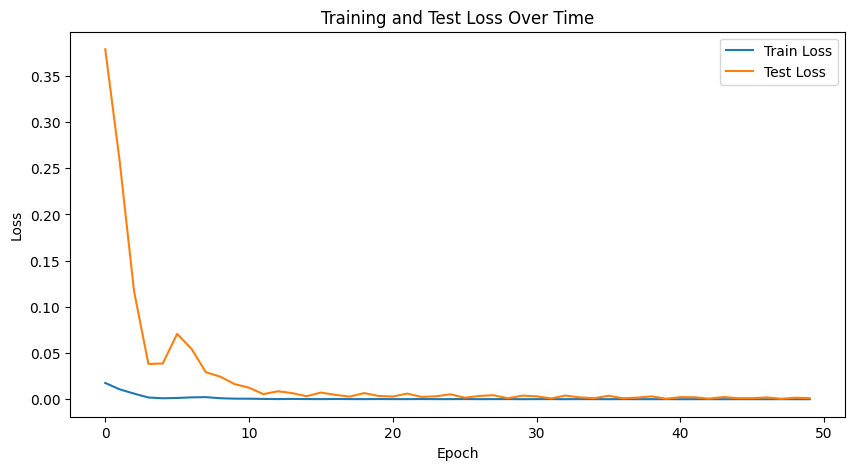

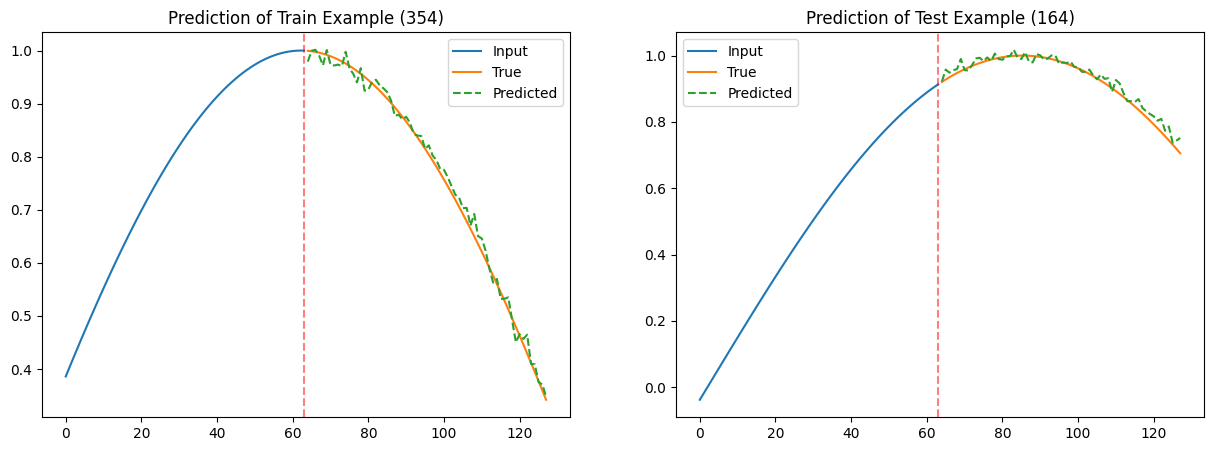

In [34]:

# Plot training curves
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()
plt.show()

# Generate predictions
model.eval()
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# Plot example prediction in first subplot
idx = np.random.randint(0, len(X_train))
with torch.no_grad():
    train_predictions = model(X_train[idx].unsqueeze(0))
input_len = X_train[idx].shape[0]
output_len =y_train[idx].shape[0]
time_steps = np.arange(input_len + output_len)
ax1.plot(time_steps[:input_len], X_train[idx,:,0].cpu().numpy(), label='Input')
ax1.plot(time_steps[input_len:], y_train[idx,:,0].cpu().numpy(), label='True')
ax1.plot(time_steps[input_len:], train_predictions[0, :,0].cpu().numpy(), "--", label='Predicted')
ax1.axvline(x=input_len-1, color='r', linestyle='--', alpha=0.5)
ax1.set_title(f'Prediction of Train Example ({idx})')
ax1.legend()

# Plot example prediction in second subplot
idx = np.random.randint(0, len(X_test))
with torch.no_grad():
    test_predictions = model(X_test[idx].unsqueeze(0))
input_len = X_test[idx].shape[0]
output_len = y_test[idx].shape[0]
time_steps = np.arange(input_len + output_len)
ax2.plot(time_steps[:input_len], X_test[idx,:,0].cpu().numpy(), label='Input')
ax2.plot(time_steps[input_len:], y_test[idx,:,0].cpu().numpy(), label='True')
ax2.plot(time_steps[input_len:], test_predictions[0, :, 0].cpu().numpy(), "--", label='Predicted')
ax2.axvline(x=input_len-1, color='r', linestyle='--', alpha=0.5)
ax2.set_title(f'Prediction of Test Example ({idx})')
ax2.legend()

plt.show()

In [11]:
# Initialize model
model = KUNet(
    input_dim=1,
    input_len=4, 
    output_dim=1,
    output_len=4,
    hidden_dim_list=[64, 64, 64],
    kernel_list=[Linear, Linear, Linear], 
    kernel_hidden_layer_list=[0, 1, 1],
    n_width=[1],
    n_height=[4, 4],
    latent_dim=64,
    latent_len=1,
    verbose=False
).to(device)
print(model)
# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
n_epochs = 50
batch_size = 32
train_losses = []
test_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    
    # Train on batches
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i+batch_size]
        batch_y = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        
    train_losses.append(train_loss/len(X_train))
    test_losses.append(test_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_loss/len(X_train):.4f}, Test Loss: {test_loss.item():.4f}')



KUNet(
  (model): KUNetEncoderDecoder(
    (encoder): KUNetEncoder(
      (layers): Sequential(
        (0): KernelWrapper(
          (kernel): Linear(
            (layers): Sequential(
              (0): Linear(in_features=4, out_features=64, bias=True)
            )
          )
        )
        (1): KernelWrapper(
          (kernel): Linear(
            (layers): Sequential(
              (0): Linear(in_features=256, out_features=160, bias=True)
              (1): Tanh()
              (2): Dropout(p=0.01, inplace=False)
              (3): Linear(in_features=160, out_features=64, bias=True)
            )
          )
        )
        (2): KernelWrapper(
          (kernel): Linear(
            (layers): Sequential(
              (0): Linear(in_features=256, out_features=160, bias=True)
              (1): Tanh()
              (2): Dropout(p=0.01, inplace=False)
              (3): Linear(in_features=160, out_features=64, bias=True)
            )
          )
        )
      )
    )
    (

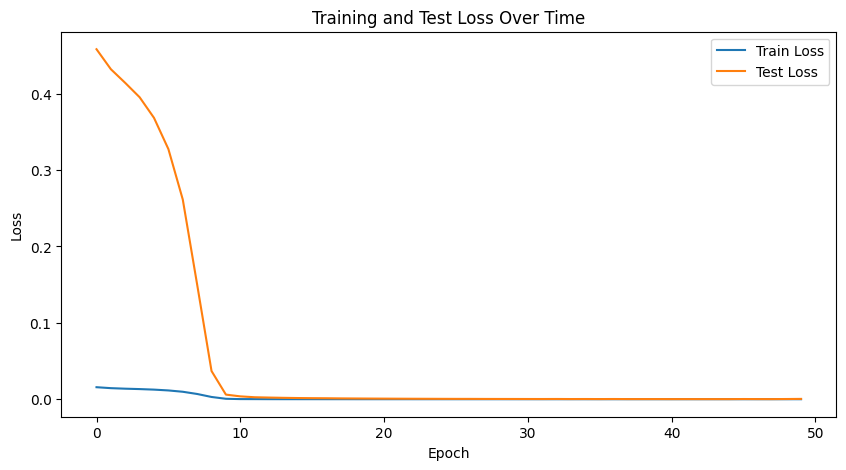

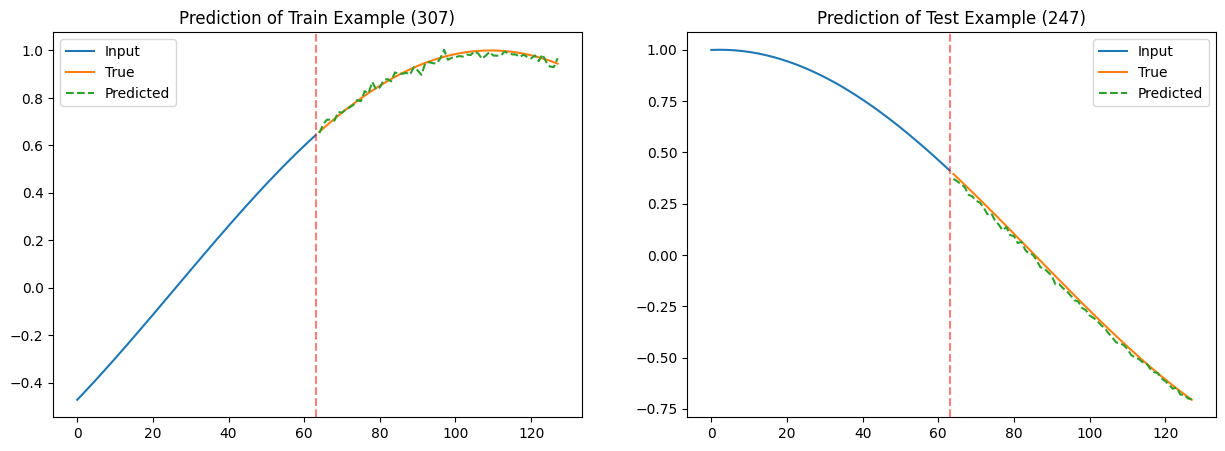

In [12]:

# Plot training curves
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.legend()
plt.show()

# Generate predictions
model.eval()
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# Plot example prediction in first subplot
idx = np.random.randint(0, len(X_train))
with torch.no_grad():
    train_predictions = model(X_train[idx].unsqueeze(0))
input_len = X_train[idx].shape[0]
output_len =y_train[idx].shape[0]
time_steps = np.arange(input_len + output_len)
ax1.plot(time_steps[:input_len], X_train[idx,:,0].cpu().numpy(), label='Input')
ax1.plot(time_steps[input_len:], y_train[idx,:,0].cpu().numpy(), label='True')
ax1.plot(time_steps[input_len:], train_predictions[0, :,0].cpu().numpy(), "--", label='Predicted')
ax1.axvline(x=input_len-1, color='r', linestyle='--', alpha=0.5)
ax1.set_title(f'Prediction of Train Example ({idx})')
ax1.legend()

# Plot example prediction in second subplot
idx = np.random.randint(0, len(X_test))
with torch.no_grad():
    test_predictions = model(X_test[idx].unsqueeze(0))
input_len = X_test[idx].shape[0]
output_len = y_test[idx].shape[0]
time_steps = np.arange(input_len + output_len)
ax2.plot(time_steps[:input_len], X_test[idx,:,0].cpu().numpy(), label='Input')
ax2.plot(time_steps[input_len:], y_test[idx,:,0].cpu().numpy(), label='True')
ax2.plot(time_steps[input_len:], test_predictions[0, :, 0].cpu().numpy(), "--", label='Predicted')
ax2.axvline(x=input_len-1, color='r', linestyle='--', alpha=0.5)
ax2.set_title(f'Prediction of Test Example ({idx})')
ax2.legend()

plt.show()